# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Bank Indonesia (BI) noted that the number of credit cards circulating in Indonesia reached 16.58 million units in June 2022. This number increased by 0.84% compared to June 2021, when there were 16.56 million credit cards.

Segmenting customer credit cards will make it easier for banks to find current nasahabah that have a tendency to be good, bad, and so on in utilizing their credit cards and can also be used to predict customers who will open a credit card account.
# The Objective
Create a clustering model to perform customer segmentation of a bank's credit card data below. This is information on credit card usage for the last six months.

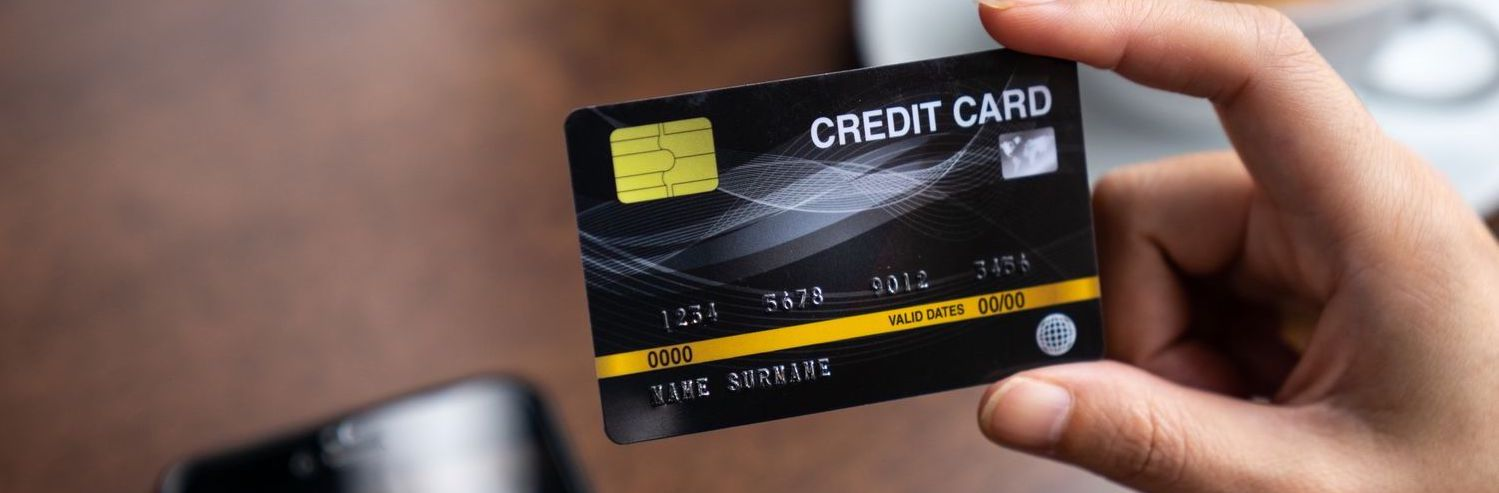

In [68]:
Image(filename='credit card.jpeg')  

**Dataset Explained** 
- BALANCE : The amount of balance remaining in the customer's account to make a purchase
- BALANCE_FREQUENCY : How often the Balance is updated, the score is between 0 and 1 (1 = frequently updated, 0 = not updated often)
- PURCHASES : The number of purchases made from the account
- ONEOFFPURCHASES : Maximum number of purchases made in one go
- INSTALLMENTS_PURCHASES : The number of purchases made in installments
- CASH_ADVANCE : Upfront cash provided by the user
- PURCHASES_FREQUENCY : How often Purchases are made, score between 0 and 1 (1 = often bought, 0 = not bought often)
- ONEOFF_PURCHASES_FREQUENCY : How often Purchases occur in one go (1 = frequently purchased, 0 = not bought often)
- PURCHASES_INSTALLMENTS_FREQUENCY : How often purchases in installments are being made (1 = frequently made, 0 = not made frequently)
- CASH_ADVANCE_FREQUENCY : How often cash in advance is paid
- CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX : Number of purchase transactions made
- CREDIT_LIMIT : Credit Card Limit for users
- PAYMENTS : The amount of Payment made by the user
- MINIMUM_PAYMENTS : Minimum amount of payment made by the user
- PRC_FULL_PAYMENT : Percentage of full payment paid by the user
- TENURE : Credit card service lease period for users

# A. Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



# B. Data Loading

In [5]:
# load dataset
data = pd.read_csv('Credit_card_customers_segmentation.csv')

# Change options so that the entire column can be displayed.
pd.set_option('display.max_columns', None)

In [6]:
# display the first 5 rows of data
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [7]:
# display the last 5 rows of data
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [8]:
# size of the display dataset 
data.shape

(4475, 18)

In [9]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

on the dataset:
- There are 4475 rows of data and 18 columns.
- consists of 14 float columns and 4 int64 columns.
- There is a missing value in the Minimum Payments column.

In [10]:
# describe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


No anomalies were found in the entire dataset. However, the value of *MAX* on some columns is significantly different from Quartil 3, **indicating that some columns have a skew distribution**, such as the *BALANCE, *ONEOFF_PURCHASE, *INSTALLATION_PURCHASE, *etc. columns. 

# C. Data Cleaning

### Missing Value

In [11]:
# checking data missing
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In column MINIMUM_PAYMENT, there is a **missing value** of 155. 

In [12]:
# There are 155 missing value records displayed. 
data[data.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000000,176.03,176.03,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
6,8629,0.228572,0.125000,60.00,60.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,1500.0,438.738982,NaN,0.0,8
21,883,1464.324632,1.000000,1174.39,1174.39,0.0,0.000000,0.250,0.250,0.0,0.000000,0,8,9000.0,0.000000,NaN,0.0,12
25,1173,16.887571,0.363636,1083.00,1083.00,0.0,0.000000,0.250,0.250,0.0,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,2693,19.949534,0.111111,0.00,0.00,0.0,326.731167,0.000,0.000,0.0,0.111111,5,0,2500.0,0.000000,NaN,0.0,9
4272,2813,0.000000,0.000000,0.00,0.00,0.0,253.887233,0.000,0.000,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0,9
4274,3943,8.187263,0.111111,0.00,0.00,0.0,793.848237,0.000,0.000,0.0,0.111111,1,0,1350.0,0.000000,NaN,0.0,9
4276,5999,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000,0.000,0.0,0.111111,1,0,4000.0,0.000000,NaN,0.0,9


found many columns containing Nan values.

In [13]:
data[data.MINIMUM_PAYMENTS.isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,155.0,4444.238710,2454.737559,67.0,2597.000000,4411.000000,6584.000000,8935.000000
BALANCE,155.0,472.655725,1299.988321,0.0,0.000000,12.281874,188.694363,9164.724752
BALANCE_FREQUENCY,155.0,0.378007,0.409665,0.0,0.000000,0.181818,1.000000,1.000000
PURCHASES,155.0,380.552581,600.804654,0.0,19.010000,130.400000,443.250000,3407.690000
ONEOFF_PURCHASES,155.0,243.559097,511.588213,0.0,0.000000,0.000000,156.055000,2483.260000
INSTALLMENTS_PURCHASES,155.0,136.993484,282.129396,0.0,0.000000,0.000000,154.415000,1990.810000
CASH_ADVANCE,155.0,508.386970,1172.157964,0.0,0.000000,0.000000,412.694209,7616.064965
PURCHASES_FREQUENCY,155.0,0.330450,0.366232,0.0,0.083333,0.166667,0.541667,1.000000
ONEOFF_PURCHASES_FREQUENCY,155.0,0.088915,0.176113,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,155.0,0.253783,0.370578,0.0,0.000000,0.000000,0.477272,1.000000


after a closer look at the data with this missing value
- turns out to be a customer who rarely purchases anything
- multiple values a value of 0 in each columnand is visible on PAYMENT
- This customer's mean or average payment is only $539.

With this in mind, we keep the data because it represents the customer in a small amount of spending segmentation.Treatment will be entered with a quantile value of 25% to represent a customer who rarely spends money. 

In [14]:
# Enter a quantile value of 25% for the missing value.
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.quantile(0.25), inplace=True)

In [15]:
# missing sample data that has entered a quantile value of 25%
data.loc[6:6, ['MINIMUM_PAYMENTS']]

,MINIMUM_PAYMENTS
6,168.590144


In [16]:
# checking data duplicated
data.duplicated().sum()

0

No duplicated data was found.

In [17]:
# see the unique number of columns, cust_id.
data.CUST_ID.nunique()

4475

As expected, the unique value column has a number of columns, which means that it has no correlation at all to the data.
Since using PCA, I want to try to ignore and stick with this column.

# D. Data Preprocessing

### Split Data : Trainig, Test

In [20]:
# separating training and test data
train, test = train_test_split(data, test_size=0.3, random_state=21)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (3132, 18)
Test size:  (1343, 18)


### Outlier Handling

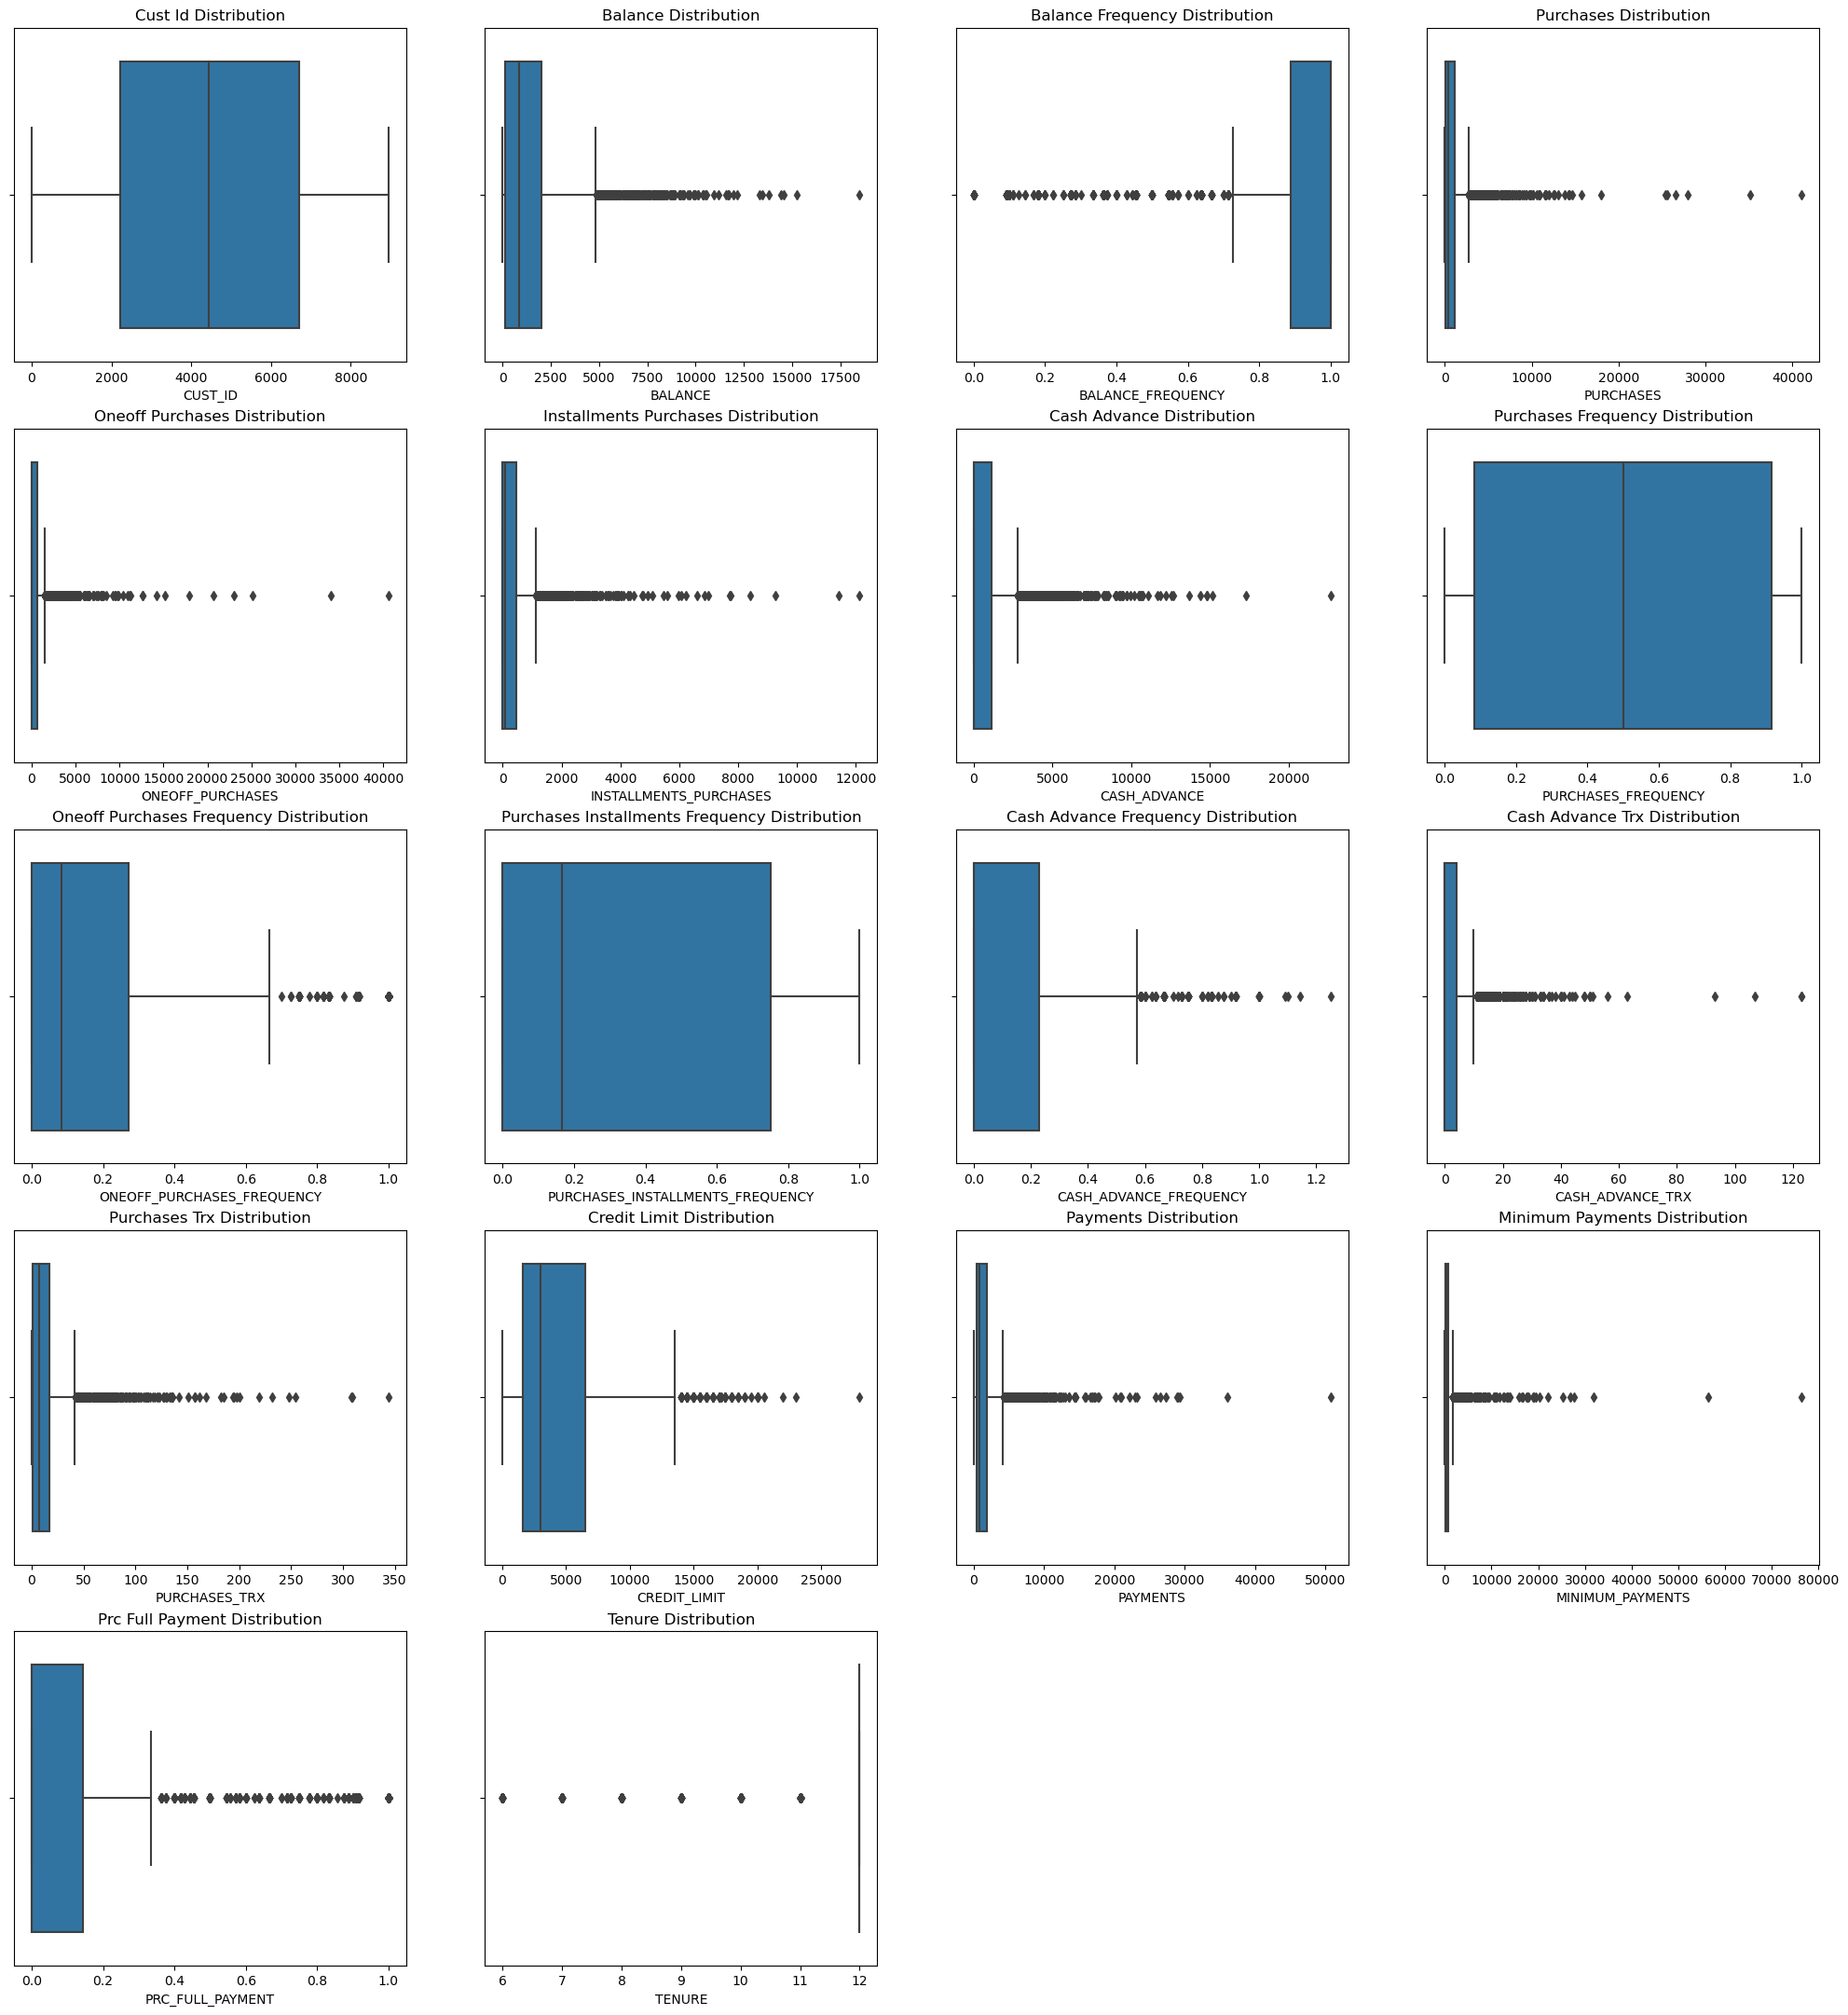

In [21]:
plt.figure(figsize=(25, 27))
for col in train.columns:
    plt.subplot(5, 4, data.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [22]:
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [23]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(train, cols[i]).shape[0] / train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,BALANCE,91.51
1,PURCHASES,90.36
2,ONEOFF_PURCHASES,88.25
3,INSTALLMENTS_PURCHASES,90.13
4,CASH_ADVANCE,88.41
5,CASH_ADVANCE_TRX,89.62
6,PURCHASES_TRX,90.93
7,CREDIT_LIMIT,97.19
8,PAYMENTS,90.74
9,MINIMUM_PAYMENTS,89.21


After reviewing the number of outliers, it turns out that there are 11 columns.
- with a very large outlier value
- This outlier is unlikely to be dropped because it accounts for 97% of the data.
- A usable meteode is nearing completion.
- but for initial observations, the authors would like to see this data in real terms for the clustered model.
- assuming the validity of the data and the real value of the data.

### Scalling Data

In [24]:
# scaling data
scaler = StandardScaler()

train = scaler.fit_transform(train)
test = scaler.transform(test)

In [25]:
# Inserting a scaler value in a dataframe
train = pd.DataFrame(train, columns=data.columns)
test = pd.DataFrame(test, columns=data.columns)

In [26]:
train.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.231031,-0.142192,0.517876,0.851724,0.094307,2.013998,-0.507637,1.258492,1.254543,1.602077,-0.672657,-0.449866,2.547177,-0.008368,-0.099552,-0.234382,-0.523861,0.364534
1,-1.577974,-0.711290,0.517876,-0.182038,-0.231143,0.020679,-0.507637,0.844228,0.702545,0.761978,-0.672657,-0.449866,0.276821,-0.421203,-0.357409,-0.277170,-0.523861,0.364534
2,-0.391007,-0.224928,0.517876,-0.476927,-0.351750,-0.488494,0.325265,-1.227090,-0.677455,-0.918222,0.162092,-0.172781,-0.584349,-0.834038,0.480118,-0.224604,0.048413,0.364534
3,-0.492880,1.364166,0.517876,-0.145805,0.050787,-0.488494,-0.507637,1.258492,2.634543,-0.918222,-0.672657,-0.449866,-0.114620,-0.008368,-0.129627,0.199001,-0.523861,0.364534
4,-0.591665,-0.524981,0.517876,0.165791,-0.314549,1.104279,-0.355866,0.015701,-0.401457,0.131903,0.162092,-0.172781,-0.310341,-0.696427,0.039214,-0.238284,0.162867,0.364534


## PCA

In [27]:
# pca train 18 components
pca = PCA(n_components=18)
pca.fit(train)

PCA(n_components=18)

In [28]:
# The explained variance ratio is still present in the array. 
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.25664457, 0.44667883, 0.53299543, 0.60276838, 0.66188527,
       0.71740494, 0.77166918, 0.81715228, 0.85781535, 0.89370639,
       0.92101703, 0.94305353, 0.96086402, 0.97479437, 0.98721675,
       0.99746505, 0.99999908, 1.        ])

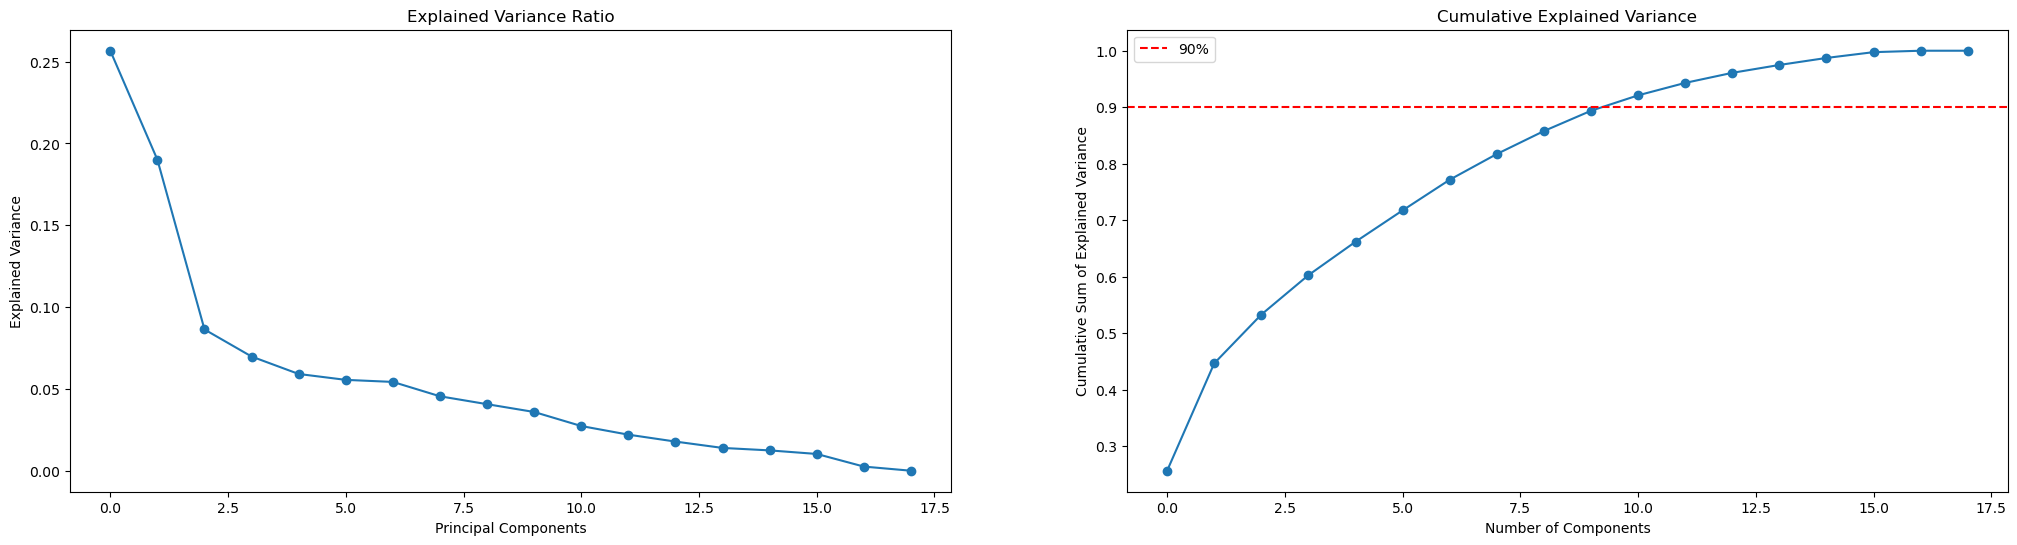

In [29]:
# Calculate the value variance ratio. 
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

In [30]:
print(f'Number of components: {np.argmax(cumsum >= 0.9)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.9)]}')

Number of components: 10
Explained variance: 0.9210170348023061


I want to retain as much information as possible with a percentage of 90%, **while the components value is 10 and the information percentage is 92%.** 

In [31]:
# Enter the optimum PCA value.
pca_10c = PCA(n_components=10)

In [32]:
train = pca_10c.fit_transform(train)
test = pca_10c.transform(test)

# Convert to dataframe
train = pd.DataFrame(train, columns=['PCA_' + str(i) for i in range(1, 11)])
test = pd.DataFrame(test, columns=['PCA_' + str(i) for i in range(1, 11)])

In [33]:
train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,3.350105,-1.133626,-1.392396,0.273895,-0.217635,0.214050,0.208023,0.901541,-1.127138,0.385279
1,0.511497,-1.353023,-0.730562,0.092970,-1.299463,-1.131306,0.680742,0.534841,-0.142732,0.332312
2,-1.573693,0.335183,0.609402,0.161773,-0.286425,-0.198579,-0.014438,0.624824,0.760376,-0.927261
3,0.917009,-0.034420,0.210951,1.154779,-2.140296,0.031781,0.657117,-1.101440,-0.158752,1.420904
4,0.051697,-0.582506,-0.504622,-0.138217,-0.020297,-0.482326,0.082226,0.908703,0.422652,-0.823334


**The PCA results have been reduced from a total of 18 columns; now only 10 columns are left with the information retained at 92%.**

# Modelling

#### **1. K-Means**

**Elbow Method**

In [34]:
# Finding the optimum K value
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = [KMeans(n_clusters=k, random_state=21).fit(train).inertia_ for k in K]

In [ ]:
# plot k value
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

- It is less visible on this chart for its optimum elbow because the formed elbows are less sharp.
- initial hypothesis of a value of k 3/4
- will be added to the silent score in order to improve observation. 

**Shilloutte Score**

In [35]:
# Finding the optimum K value
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])

In [36]:
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(train, KMeans(n_clusters=i, random_state=21).fit(train).labels_), 3)]

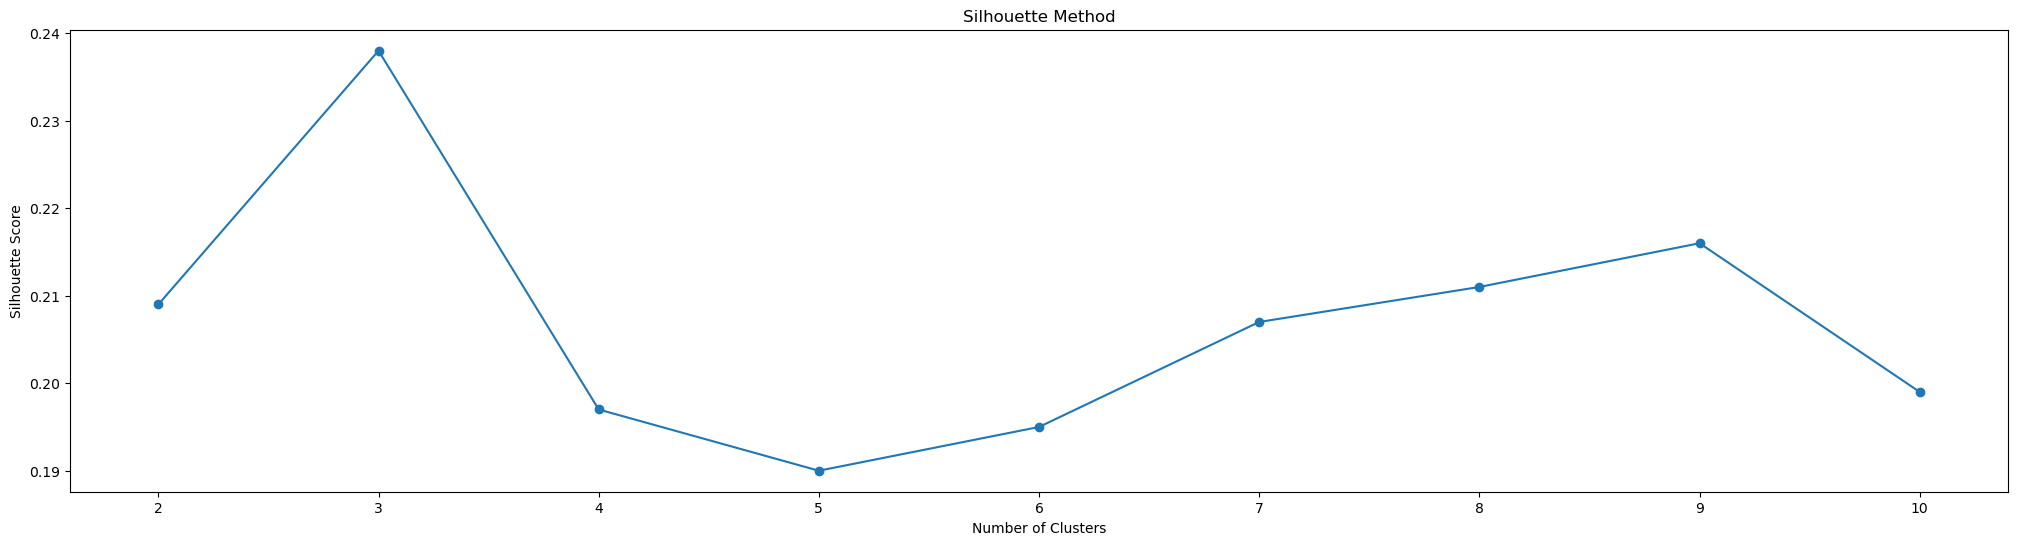

In [37]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

- On the graph, it is seen that the highest value is at k = 3.
- Determine whether 3 is the best K value. 

**The most effective cluster kmeans**

In [38]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(train)

KMeans(n_clusters=3, random_state=21)

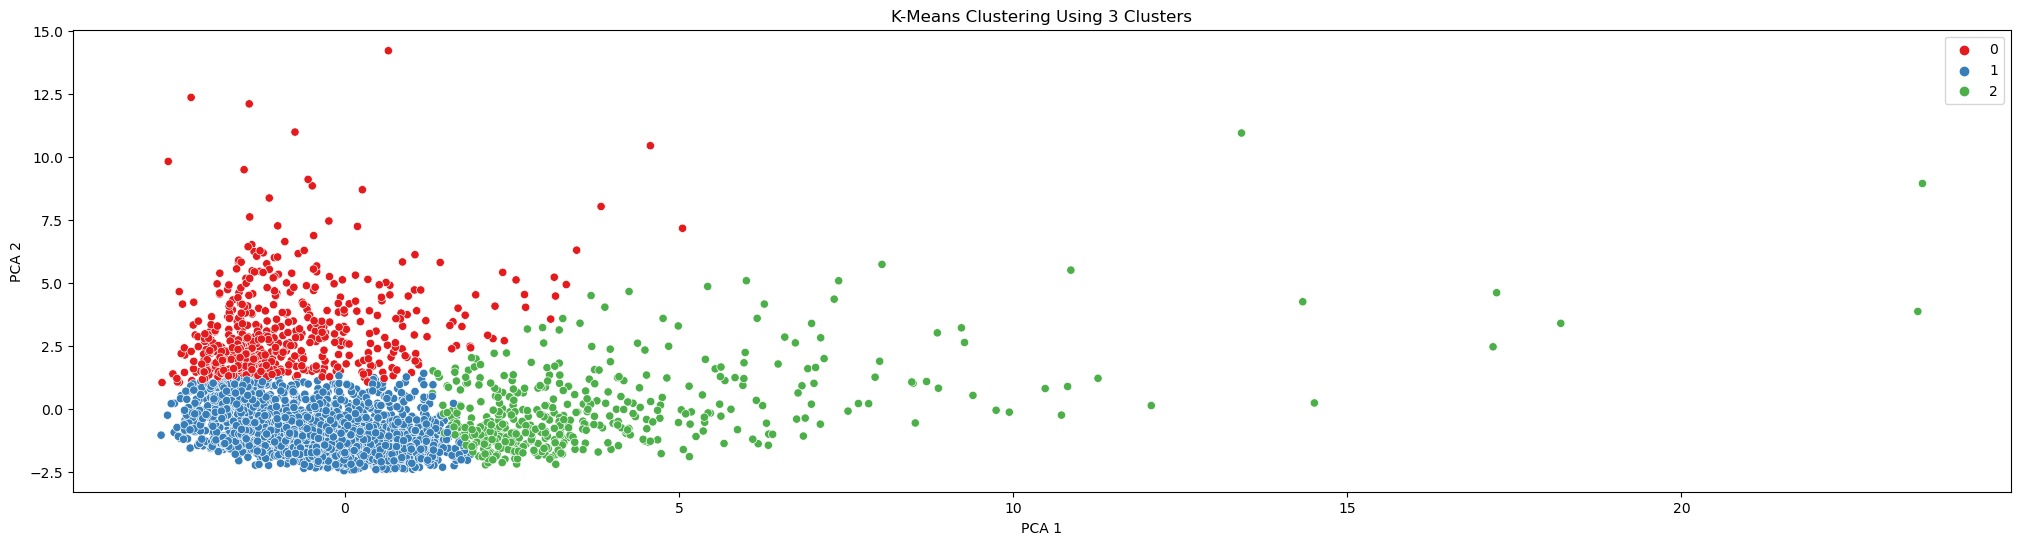

In [41]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=train, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### **2. DBSCAN**

In [42]:
dbscan_score = pd.DataFrame(columns=['eps', 'Silhouette Score'])
epsilons = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [43]:
# Looking for the best Silhoette value
for i in range(len(epsilons)):
    dbscan_score.loc[i] = [epsilons[i], round(silhouette_score(train, DBSCAN(eps=epsilons[i]).fit(train).labels_), 3)]

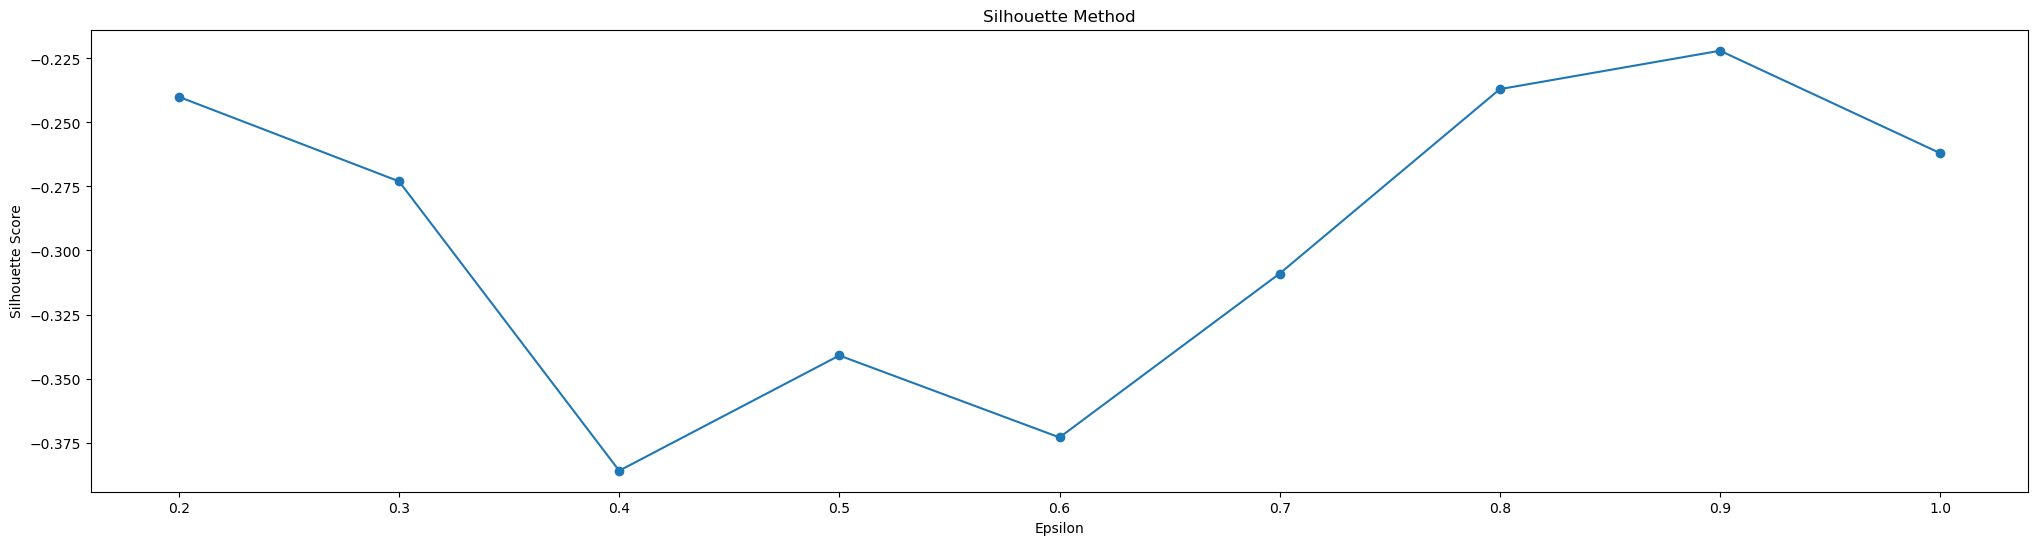

In [44]:
# Plot display
plt.figure(figsize=(25, 6))
plt.plot(dbscan_score['eps'], dbscan_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [45]:
# displaying sort the best epsilon values
dbscan_score.sort_values(by='Silhouette Score', ascending=False)

,eps,Silhouette Score
7,0.9,-0.222
6,0.8,-0.237
0,0.2,-0.240
8,1.0,-0.262
1,0.3,-0.273
5,0.7,-0.309
3,0.5,-0.341
4,0.6,-0.373
2,0.4,-0.386


- Best Epsilon Value is 0.9

**Best DBSCAN Epsilon**

In [46]:
dbscan = DBSCAN(eps=0.9)
dbscan.fit(train)

DBSCAN(eps=0.9)

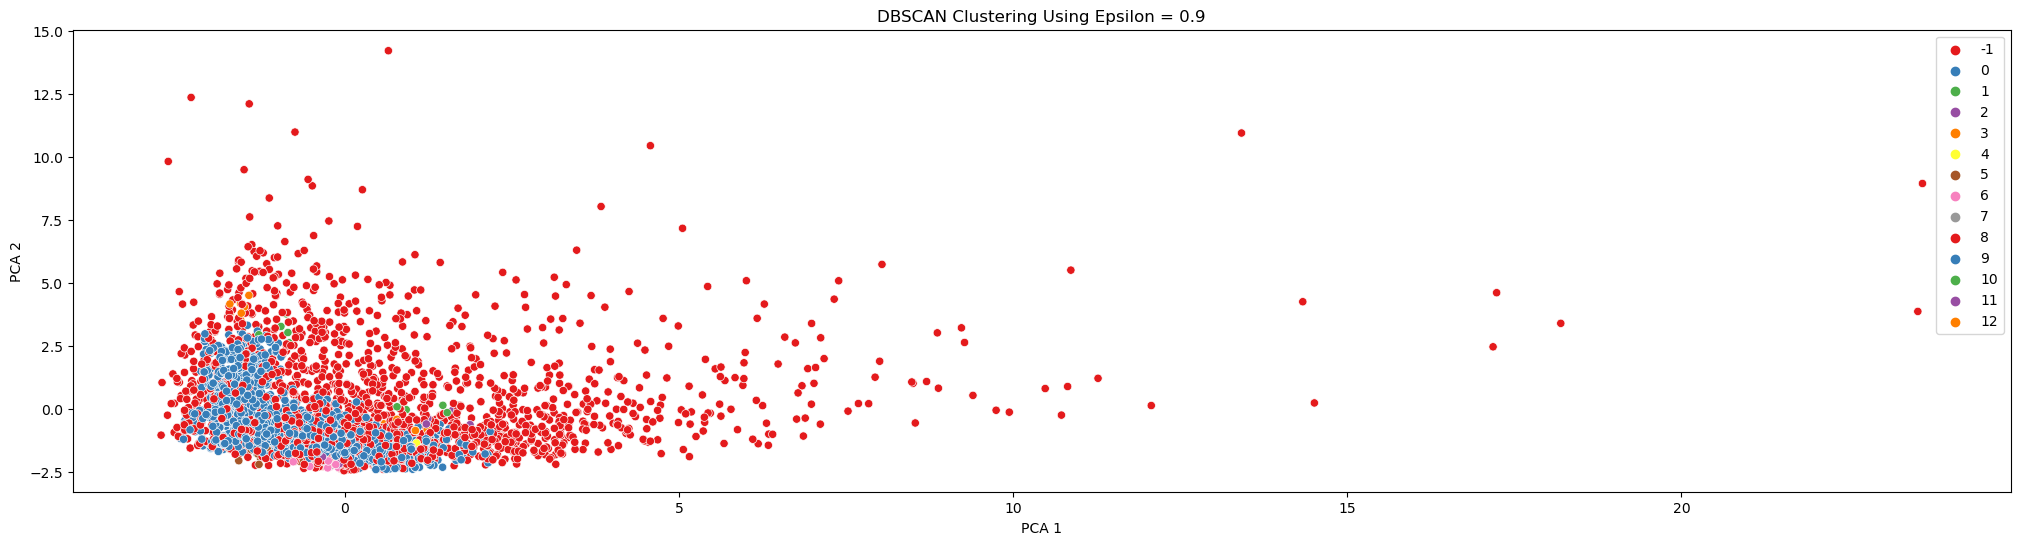

In [47]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=dbscan.labels_, data=train, palette='Set1')
plt.title('DBSCAN Clustering Using Epsilon = 0.9')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Dbscan generated a large number of clusters.There are 13 clusters.
- In principle, dbscan has no match for this data distribution; the way it works is like a virus infecting its surroundings.
- and in the data, we discovered a lot of data that was disjointed or an outlier, so dbcsan divided it into small clusters. 

### **3. Agglomerative Clustering**

**shilloutte score and n cluster**

In [48]:
# Looking for the best silloette value between 2-11
agglomerative_score = pd.DataFrame(columns=['n_clusters', 'Silhouette Score'])
for i in range(2, 11):
    agglomerative_score.loc[i-2] = [i, round(silhouette_score(train, AgglomerativeClustering(n_clusters=i, linkage='ward').fit(train).labels_), 3)]

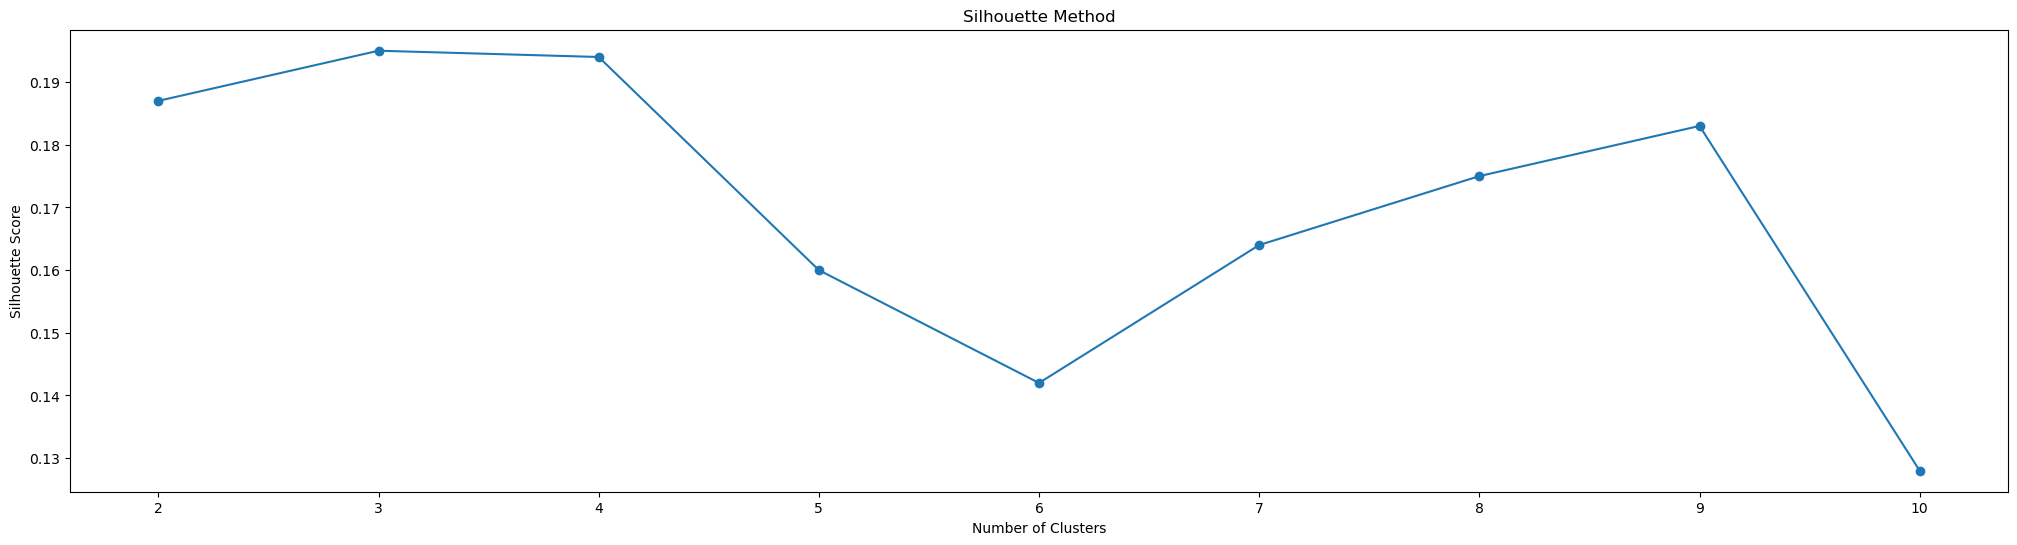

In [49]:
# plot nilai cluster dan shilloutte score
plt.figure(figsize=(25, 6))
plt.plot(agglomerative_score['n_clusters'], agglomerative_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [51]:
# The cluster value and its shillouette score are displayed. 
agglomerative_score.sort_values(by='Silhouette Score', ascending=False)

,n_clusters,Silhouette Score
1,3.0,0.195
2,4.0,0.194
0,2.0,0.187
7,9.0,0.183
6,8.0,0.175
5,7.0,0.164
3,5.0,0.160
4,6.0,0.142
8,10.0,0.128


In the agglomerative model, the optimum cluster value is 3.

**Aglomerative n_cluster Terbaik**

In [52]:
# modelling aglomerative cluster terbaik
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative.fit(train)

AgglomerativeClustering(n_clusters=3)

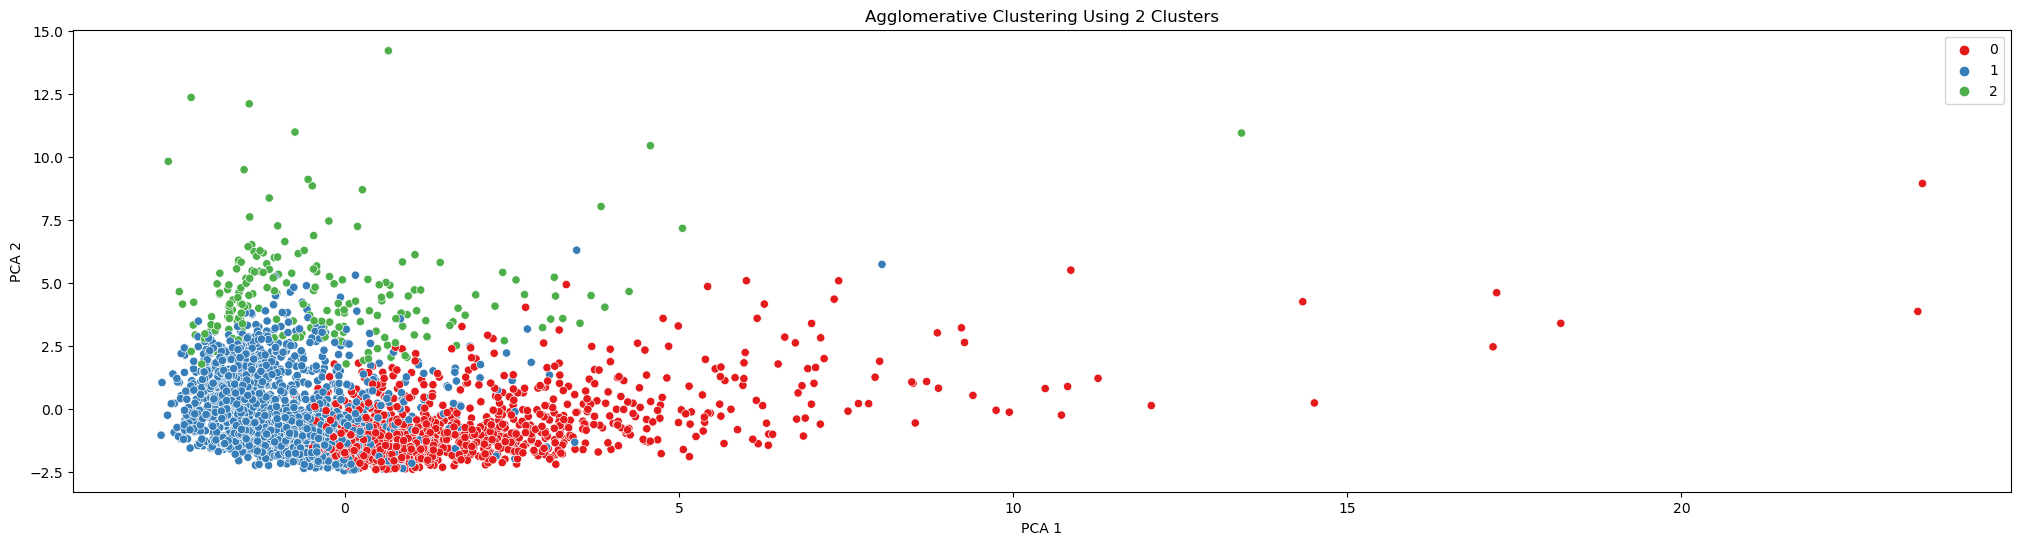

In [53]:
# plot cluster
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agglomerative.labels_, data=train, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Three clusters represent the same data as the K-mean in the agglomerative model.
- Here what is noted is that the clusters still look mixed, such as cluster 1, represented by a blue dot, spreading to the part of cluster 0, which has a red dot.
- The working principle of agglomerative culling is to divide data on tree hierarchies such as dendograms.

In general, of the three clustering models, namely Kmeans, DBScan, and Agglomerative, which are quite representative of the data sharing, according to the author, it is the Kmeans model with the highest number of clusters (3).

# Model di test

In [54]:
# testing dataset
test.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,0.251771,-1.224392,-0.242431,0.716776,-0.501779,1.591399,-0.108144,0.437923,-0.246519,0.162202
1,-1.928834,2.994508,0.044909,-0.956117,-0.043066,0.501901,-0.468915,1.367730,0.567848,-0.038593
2,1.465811,-1.914323,-1.338832,-0.910288,0.597956,0.083260,-1.948851,-0.946839,0.796435,-1.045697
3,-2.076479,0.064153,0.777935,-0.230919,0.526455,0.743618,-0.684537,0.768322,0.273925,0.340378
4,0.347751,0.342153,0.279173,1.167184,-0.667872,-0.039651,0.388940,-1.544764,-0.797190,-0.004374


In [55]:
# pedict data test
pred = kmeans.predict(test)

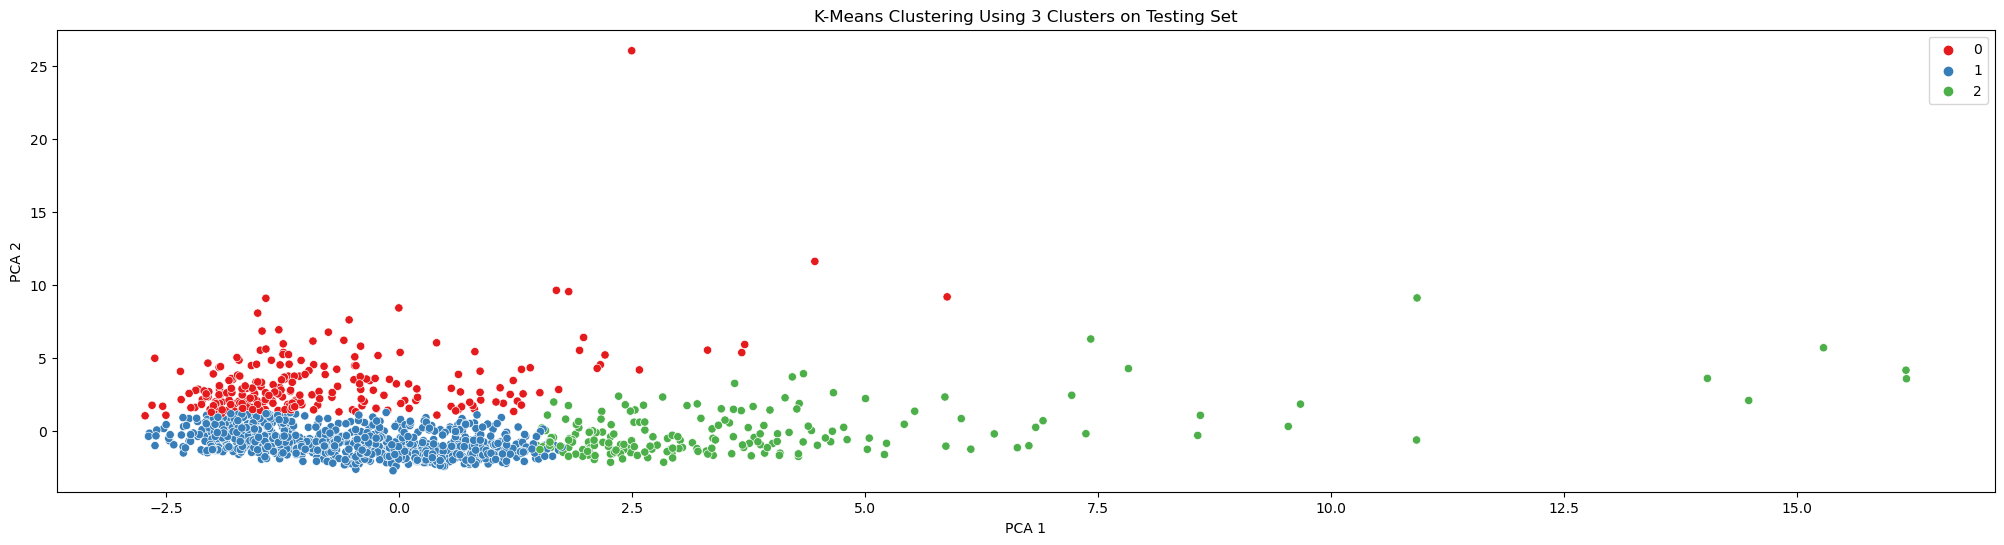

In [56]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred, data=test, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters on Testing Set')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Clusters created by data testing are as good as clusters created by data training.

# Clustering of EDA Data Results

In [58]:
# load data into new variables to combine with clustering results
df = pd.read_csv('Credit_card_customers_segmentation.csv')

In [59]:
# load data intact.
data = pd.concat([train, test])
data_pred = kmeans.predict(data)

In [60]:
# Combine data with cluster columns
cluster_cc = df.copy()
cluster_cc['CLUSTER'] = data_pred
cluster_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8,2
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8,1
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,1


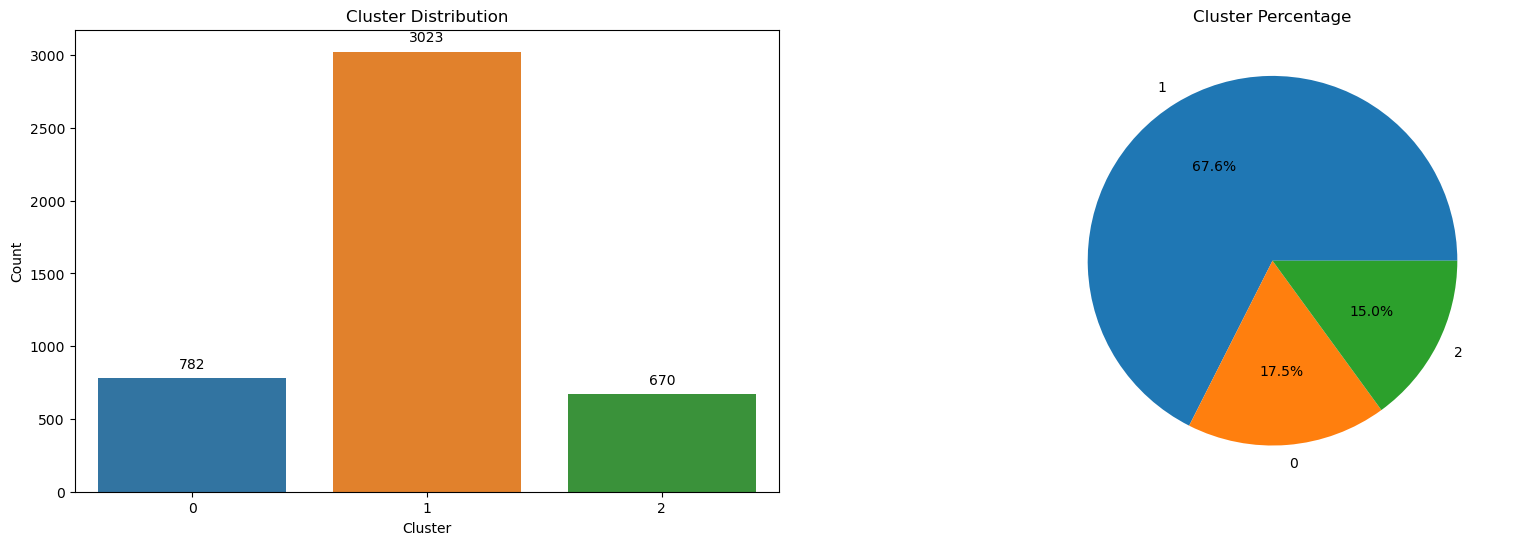

In [61]:
# plot cluster
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='CLUSTER', data=cluster_cc)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(cluster_cc['CLUSTER'].value_counts(), labels=cluster_cc['CLUSTER'].value_counts().index, autopct='%1.1f%%')
plt.title('Cluster Percentage')
plt.show()

After plotting, the results of clustering are obtained.
- Cluster 0 totals 17.5% or 782 customers
- Cluster 1 totals 67.6% or 3023 customers.
- Cluster 2 totals 15.0% or 670 customers.

In [62]:
# Data Selection on Cluster 0
cluster0 = cluster_cc[cluster_cc["CLUSTER"] == 0]

In [63]:
# Displays Describe Cluster 0
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,782.0,4617.631714,2585.883638,5.000000,2378.500000,4837.000000,6833.500000,8935.00000
BALANCE,782.0,1517.885495,2077.318815,0.000000,96.871877,796.229896,1893.605507,16115.59640
BALANCE_FREQUENCY,782.0,0.868345,0.244980,0.000000,0.833333,1.000000,1.000000,1.00000
PURCHASES,782.0,925.985064,1885.997957,0.000000,55.125000,333.180000,997.697500,27957.68000
ONEOFF_PURCHASES,782.0,514.199731,1342.878075,0.000000,0.000000,9.855000,440.695000,23032.97000
INSTALLMENTS_PURCHASES,782.0,411.813465,925.912470,0.000000,0.000000,97.500000,468.260000,12738.47000
CASH_ADVANCE,782.0,961.563080,1849.565767,0.000000,0.000000,0.000000,1175.805985,16323.64243
PURCHASES_FREQUENCY,782.0,0.475634,0.392190,0.000000,0.083333,0.416667,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,782.0,0.177762,0.276810,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,782.0,0.364121,0.391016,0.000000,0.000000,0.250000,0.750000,1.00000


In [64]:
# Data Selection on Cluster 1
cluster1 = cluster_cc[cluster_cc["CLUSTER"] == 1]

In [65]:
# Displays Describe Cluster 1
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,3023.0,4475.673503,2582.754023,1.00000,2224.000000,4441.000000,6755.000000,8949.00000
BALANCE,3023.0,1586.984284,2111.870419,0.00000,126.152932,879.190921,2064.570658,18495.55855
BALANCE_FREQUENCY,3023.0,0.879022,0.237199,0.00000,0.900000,1.000000,1.000000,1.00000
PURCHASES,3023.0,1023.879282,2150.823751,0.00000,41.630000,360.000000,1119.235000,41050.40000
ONEOFF_PURCHASES,3023.0,627.353420,1796.939044,0.00000,0.000000,49.890000,614.675000,40624.06000
INSTALLMENTS_PURCHASES,3023.0,396.643202,818.620238,0.00000,0.000000,86.220000,448.025000,12541.00000
CASH_ADVANCE,3023.0,957.691761,1915.637842,0.00000,0.000000,0.000000,1117.135892,27296.48576
PURCHASES_FREQUENCY,3023.0,0.498641,0.405525,0.00000,0.083333,0.500000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,3023.0,0.210085,0.303433,0.00000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,3023.0,0.365759,0.400546,0.00000,0.000000,0.166667,0.750000,1.00000


In [66]:
# Data Selection on Cluster 2
cluster2 = cluster_cc[cluster_cc["CLUSTER"] == 2]

In [67]:
# Displays Describe Cluster 2
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,670.0,4305.486567,2580.656562,13.000000,2140.000000,4154.000000,6390.500000,8939.00000
BALANCE,670.0,1508.814378,1876.187699,0.000000,135.136432,903.960774,2110.464902,11631.32337
BALANCE_FREQUENCY,670.0,0.877533,0.234943,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,670.0,1000.361746,1822.725189,0.000000,20.610000,391.810000,1172.632500,15704.04000
ONEOFF_PURCHASES,670.0,552.480134,1255.912825,0.000000,0.000000,40.825000,552.495000,12618.86000
INSTALLMENTS_PURCHASES,670.0,448.847284,1076.121944,0.000000,0.000000,84.890000,513.425000,14686.10000
CASH_ADVANCE,670.0,1130.816056,2792.190498,0.000000,0.000000,0.000000,1123.136629,47137.21176
PURCHASES_FREQUENCY,670.0,0.471647,0.402855,0.000000,0.083333,0.416667,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,670.0,0.195824,0.297185,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,670.0,0.355160,0.392327,0.000000,0.000000,0.166667,0.750000,1.00000


# Summary

- for the average2 balance in clusters 0 (1518 dollars), 1 (1587 dollars), and 2 (1509 dollars).
- Average purchase: 926 dollars in Cluster 0, 1024 dollars in Cluster 1, and 1000 dollars in Cluster 2.
- Average Credit Limit: 4478 dollars in Cluster 0, 4494 dollars in Cluster 1, and 4519 dollars in Cluster 2.
- etc

**Summary of the cluster,**

In the complete description, it is depicted if the cluster obtained is sufficient to represent the division of data, where there are Part 3 clusters.
- 3023 customers are in Cluster 1, representing customers with high credit card usage and frequent shopping.
- 782 customers are in Cluster 0, representing customers with rare credit card usage.
- and 670 customers in cluster 2 representing customers who use medium-type credit cards. 

In the next update, correct the data used.
- drop id column, which clearly has no bearing on other rows
- Remove outlier data, as the unsupervised model is very sensitive to outliers (for example, dbscan).
- Handling outliers can be done by either capping or dropping; the best option is capping to maintain the amount of data.

# Conceptual Problems
### Inertia
- Inertia in Kmeans is the total value of the distance between each point and its nearest centroid.
#### translate
- inertia pada Kmeans adalah nilai total jarak antara tiap titik dengan centroid terdekatnya

### Elbow method
- The elbow method is a method used to determine the number of clusters in k-means clustering.
- As the name implies, this is where we select the best elbow point.
- The advantage is that you can see the best K value on the elbow method chart without trying one by one.
- The downside is that if the elbow does not form a pointed elbow, then the determination of its k becomes subjective.
#### translate
- Elbow method adalah metoda yang digunakan untuk menentukan jumlah cluster pada k-means clustering
- sesuai namanya elbow/siku, dimana kita memilih titik siku optimumnya
- kelebihannya adalah dapat melihat nilai k yang terbaik pada grafik elbow methode tanpa mencoba satu persatu
- kelemahannya adalah jika elbow tidak membentuk siku yang lancip maka penentuan k nya menjadi subjective

### Clustering Algoritm
- K Means: The K Means Clustering algorithm begins by specifying the starting point. Normally, this starting point is chosen at random; however, in order to improve precision and keep the centroid stable, the algorithm will begin performing repeated calculations.The process will stop automatically if the centroid has stabilized.
- DBScan: a data point is said to be neighborly if the distance between it and its neighbors is less than or equal to the epsilon value.In simple terms, the spread is like a virus and will stop when there is no data nearby anymore, then start on another set of data for the new cluster.
- Agglomerative: clustering techniques form a hierarchy or are based on a certain level so that they resemble the structure of a tree. Thus, the grouping process is carried out in a multilevel or gradual manner, like a dendogram.
#### translate
- K Means : algoritma K Means Clustering dimulai dengan menentukan titik awal. Biasanya, titik awal ini dipilih secara acak, Agar titik awal semakin presisi dan centroid tetap stabil, maka algoritma akan mulai melakukan perhitungan berulang. Proses tersebut akan berhenti secara otomatis jika centroid telah stabil.
- DBScan : sebuah data akan dikelompokkan dengan tetangganya, dikatakan bertetangga apabila jarak antara dua data tersebut kurang dari/sama dengan nilai epsilon. secara sederhana persebarannya seperti virus dan akan berhenti ketika tidak ada data didekatnya lagi, kemudian mulai pada data yang lain untuk cluster baru.
- Aglomerative : teknik clustering membentuk hirarki atau berdasarkan tingkatan tertentu sehingga menyerupai struktur pohon. Dengan demikian proses pengelompokannya dilakukan secara bertingkat atau bertahap seperti Dendogram.

